<a href="https://colab.research.google.com/github/opedalconsultingllc/opedalconsultingllc/blob/main/relative_strenght_indicator_rsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt
% matplotlib inline

In [11]:
ticker = 'goog'
start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()
data = web.DataReader(ticker, 'stooq', start, end)

In [12]:
delta = data['Close'].diff(1)
delta.dropna(inplace=True)


In [13]:
pos = delta.copy()
pos[pos<0] = 0

neg = delta.copy()
neg[neg>0] = 0

In [14]:
days = 15
avg_gain = pos.rolling(window = days).mean()
avg_loss = abs(neg.rolling(window = days).mean())
relative_strength = avg_gain/avg_loss

rsi = 100.0 - (100.0 / (1.0 + relative_strength) )

In [15]:
df = pd.DataFrame()
df['Close'] = data['Close']
df['rsi'] = rsi

<function matplotlib.pyplot.show>

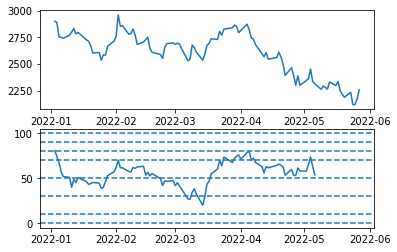

In [16]:
plt.figure()
ax1 = plt.subplot(211)
ax1.plot(df.index, df['Close'])

ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(df.index, df['rsi'])
ax2.axhline(0, linestyle = '--')
ax2.axhline(10, linestyle = '--')
ax2.axhline(30, linestyle = '--')
ax2.axhline(50, linestyle = '--')
ax2.axhline(70, linestyle = '--')
ax2.axhline(80, linestyle = '--')
ax2.axhline(90, linestyle = '--')
ax2.axhline(100, linestyle = '--')
plt.show